# Сборный проект-(5)


## Описание
Я работаю в фотохостинге для профессиональных фотографов «Со Смыслом» (“With Sense”). 
Моя задача: создать демонстрационную версию поиска картинок по текстовому запросу для нашего фотохостинга.

Суть проекта: Пользователь вводит описание сцены (например, «Человек переходит горный перевал по металлическому мосту»), а система находит наиболее подходящие фотографии.

Что нужно сделать мне лично:

Выбрать и обучить модель, которая сможет понять, насколько хорошо текст запроса и изображение подходят друг другу. Модель должна выдавать оценку от 0 до 1.

Для обучения у меня есть данные:

Фотографии и их текстовые описания.

Результаты краудсорсинга и экспертной оценки, которые показывают, насколько точны эти описания.

Обеспечить безопасность контента. По закону мы не можем показывать изображения с детьми до 16 лет. В финальном продукте вместо таких картинок показывается дисклеймер, но в моей демо-версии я должен заранее отфильтровать данные и убедиться, что в тестовых запросах нет «вредного» контента.

Конечная цель: Показать работающий прототип руководству, чтобы доказать, что такая система поиска может быть реализована на практике. Для разработки я буду использовать только один фреймворк — PyTorch или Keras.

### Инструкция по выполнению проекта

Шаг 1. Загрузите данные и проведите исследовательский анализ данных
Скачайте  и откройте файлы с данными. Проверьте данные и откорректируйте их, если потребуется.


Шаг 2. Подготовьте данные к обучению модели
Создайте список слов которые, по вашему мнению, могут попадать под юридические ограничения.
Исключите из обучающего датасета пары, которые, исходя из подготовленного вами списка слов, могут попадать под юридические ограничения.
Сделайте векторизацию текстового описания одним из следующих методов:
TF-IDF;
BERT;
word2vec.
Сделайте векторизацию изображений с использованием модели ResNet50 из библиотеки Keras или PyTorch.
Дайте описание получившихся пар векторов с точки зрения их размерностей.


Шаг 3. Обучите модель
Создайте модель, которая покажет близость двух векторов. Модель должна принимать на вход конкатенированный вектор, состоящий из векторов описания и изображений, и предсказывать итоговую оценку экспертов.
Выберите метрику, по которой вы будете сравнивать точность различных моделей.
Обучите несколько моделей и подберите их гиперпараметры. В качестве моделей обязательно нужно рассмотреть:
1. Линейную регрессию;
2. Полносвязные нейронные сети.


Шаг 4. Тестирование модели и демонстрация ее работы
Проведите тестирование лучшей модели на тестовых данных.
Напишите функцию, которая принимает на вход текстовое описание, делает его векторизацию и возвращает картинку с максимальным значением метрики.
💡 Если запрос ведёт на юридически вредный контент, функция должна выводить дисклеймер.
С помощью написанной вами функции протестируйте работу модели на нескольких текстовых описаниях: проверьте, какие картинки она выдает при различных текстовых запросах.


Шаг 5. Сделайте общий вывод по работе
Опишите модель, которая лучше всего справляется с задачей сравнения сходства картинки и текста. Опишите, какие ошибки допускает модель во время поиска картинки по её текстовому описанию. Оцените, насколько проект по созданию сервиса поиска фотографий по текстовому описанию практически осуществим.
Оформление
Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.
Для проекта вам могут потребоваться серьёзные мощности, например, GPU. В Яндекс.Практикуме существуют ограничения по выделяемым ресурсам в JupyterHub. Поэтому необходимо выполнять проект в Kaggle, Google Colab, DeepNote, Yandex Data Sphere или локально.

### Конкретная задача
Мне поручено разработать демонстрационную версию поиска изображений по запросу.
Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.



### Описание данных
Данные доступны по [ссылке](https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip).

В файле `train_dataset.csv` находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install spacy[transformers]
!pip install torchvision
!pip install -q --upgrade keras-nlp tensorflow
!pip install -q sentence-transformers
!pip install tf-keras

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - ------------------------------------- 0.5/12.8 MB 586.3 kB/s eta 0:00:21
     - ------------------------------------- 0.5/12.8 MB 586.3 kB/s eta 0:00:21
     -- ------------------------------------ 0.8/12.8 MB 531.5 kB/s eta 0:00:23
     -- ------------------------------------ 0.8/12.8 MB 531.5 kB/s eta 0:00:23
     --- -----------------------

In [2]:
# Стандартная библиотека
import os
import re
import pickle
from math import ceil
from pathlib import Path

# Сторонние библиотеки
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import spacy
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

# from tensorflow import keras
import tensorflow as tf
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                             r2_score)
from sklearn.model_selection import (GridSearchCV, GroupShuffleSplit,
                                     cross_val_score)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import LinearSVR
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.pipeline import Pipeline
import glob
from tqdm import notebook

# TensorFlow/Keras импорты
from tensorflow import keras
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import (BatchNormalization, Dense, Dropout,
                                     Flatten, GlobalAveragePooling2D)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_nlp

# Sentence Transformers
import sentence_transformers
from sentence_transformers import SentenceTransformer, util

from tqdm import tqdm


In [3]:
PATH = 'C:/Users/Neria/Desktop/Project_five/dsplus_integrated_project_4/to_upload/'
RANDOM_SEED = 89

## Извлечение данных

### Загрузка данных

csv файлы. Это тренировочный датасет(информация, необходимая для обучения), тестовые запросы(информация, необходимая для тестирования) и изображения(изображения для тренировки модели). Последние два были неразделены.

In [4]:
train_dataset = pd.read_csv('C:/Users/Neria/Desktop/Project_five/dsplus_integrated_project_4/to_upload/train_dataset.csv')
test_queries = pd.read_csv('C:/Users/Neria/Desktop/Project_five/dsplus_integrated_project_4/to_upload/test_queries.csv', sep='|', index_col=0)
test_images = pd.read_csv('C:/Users/Neria/Desktop/Project_five/dsplus_integrated_project_4/to_upload/test_images.csv', sep='|')

tsv файлы. Аннотации множества (данные по соответствию изображения и описания, полученные с помощью краудсорсинга) и экспертного (данные по соответствию изображения и описания, полученные в результате опроса экспертов)

In [5]:
CrowdAnnotations = pd.read_csv('C:/Users/Neria/Desktop/Project_five/dsplus_integrated_project_4/to_upload/CrowdAnnotations.tsv', sep='\t', header=None)
ExpertAnnotations = pd.read_csv('C:/Users/Neria/Desktop/Project_five/dsplus_integrated_project_4/to_upload/ExpertAnnotations.tsv', sep='\t', header=None)

Все это содержалось в репозитории dsplus_integrated_project_4 (хотя проект под номером 5)

Есть еще train_images и test_images(как репозитории), но в них данные нетабличного формата. Это сами изображения.

### Просмотр данных

In [6]:
display(train_dataset.head(5))
train_dataset.info()


,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


In [7]:
display(test_queries.head(5))
test_queries.info()

,query_id,query_text,image
0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg
1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg
2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg
3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at eac...,1177994172_10d143cb8d.jpg
4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each oth...,1177994172_10d143cb8d.jpg


<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    500 non-null    object
 1   query_text  500 non-null    object
 2   image       500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


In [8]:
display(test_images.head(5))
test_images.info()

,image
0,3356748019_2251399314.jpg
1,2887171449_f54a2b9f39.jpg
2,3089107423_81a24eaf18.jpg
3,1429546659_44cb09cbe2.jpg
4,1177994172_10d143cb8d.jpg


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   100 non-null    object
dtypes: object(1)
memory usage: 932.0+ bytes


In [9]:
display(CrowdAnnotations.head(5))
CrowdAnnotations.info()

,0,1,2,3,4
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       47830 non-null  object 
 1   1       47830 non-null  object 
 2   2       47830 non-null  float64
 3   3       47830 non-null  int64  
 4   4       47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


In [10]:
display(ExpertAnnotations.head(5))
ExpertAnnotations.info()

,0,1,2,3,4
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5822 non-null   object
 1   1       5822 non-null   object
 2   2       5822 non-null   int64 
 3   3       5822 non-null   int64 
 4   4       5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.6+ KB


train_dataset содержит название.jpg изображений, id его описания и само описание  Строк 5822 .
Описание гласит: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат <имя файла изображения>#<порядковый номер описания>.


test_queries содержит название.jpg изображений, id его описания и само описание. Строк 500.
Описание гласит: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат <имя файла изображения>#<порядковый номер описания>.


test_images содержит название.jpg изображений. Строк 100.
Описания нет.


CrowdAnnotations содержит неназванные столбцы. Будем судить по описанию датасетов. Первые два - название.jpg изображений и id его описания. Остальные три - доля людей, подтвердивших, что описание соответствует изображению, количество человек, подтвердивших, что описание соответствует изображению, количество человек, подтвердивших, что описание не соответствует изображению. Строк 47830.


ExpertAnnotations содержит  неназванные столбцы.  Будем судить по описанию датасетов. Там содержатся: название изображения, идентификатор описания и 3, 4, 5 — оценки трёх экспертов.
Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В общем, сложно.

## 1. Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке.
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок выберите либо одну из них, либо объедините их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Ваша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.

### Предобработка данных

#### CrowdAnnotations и ExpertAnnotations

Переименуем столбцы в tsv файлах. Переименую в стиле других датасетов этого проекта.

In [11]:
ExpertAnnotations = ExpertAnnotations.rename(columns={
    0: 'image',
    1: 'query_id',
    2: 'first_expert', 
    3: 'second_expert',
    4: 'third_expert'
})

CrowdAnnotations = CrowdAnnotations.rename(columns={
    0: 'image', 
    1: 'query_id',
    2: 'consonant_rate',
    3: 'consonant_count',
    4: 'dissenters_count'
})

In [12]:
display(CrowdAnnotations.head(5))

,image,query_id,consonant_rate,consonant_count,dissenters_count
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3


In [13]:
display(ExpertAnnotations.head(5))

,image,query_id,first_expert,second_expert,third_expert
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


Странно, что у экспертов нет средней оценки, как у краундфайндеров. Добавлю столбец со средним баллом, потому что я ничего не знаю о компетентности данных экспертов. Я их обезличу и обьеденю в одного. А оригинальных удалю, что бы не нагружать себя и модель в будущем.

Иначе интепретировать разные суждения из этой размытой четырехбальной системой-довольно проблематично.

#### ExpertAnnotations

In [14]:
ExpertAnnotations['average_score'] = ExpertAnnotations[['first_expert', 'second_expert', 'third_expert']].mean(axis=1)

#ExpertAnnotations = ExpertAnnotations.drop(['first_expert', 'second_expert', 'third_expert'], axis=1)

In [15]:
display(ExpertAnnotations.head(5))

,image,query_id,first_expert,second_expert,third_expert,average_score
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,1.000000
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,1.333333
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2,1.333333
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2,1.666667
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2,1.333333


Уже на этом этапе стоит задуматься об оценках.

Средний балл от 1.0 до 4.0 можно рассматривать как степень соответствия:
1.0-1.5 - практически не соответствуют
1.5-2.5 - частичное соответствие с оговорками
2.5-3.5 - хорошее соответствие с мелкими недочетами
3.5-4.0 - практически полное соответствие

Но я (пока) не буду 

In [16]:
print(CrowdAnnotations.drop_duplicates().shape[0])
print(ExpertAnnotations.drop_duplicates().shape[0])


47830
5822


Явных дубликатов в них нe было. (И уже нет)

#### train_dataset
РАссмотрю train_dataset. В нем 5822 строчки. Как раз столько экспертных оценок. Может, свяжу эти датасеты, но сначала сверюсь с количеством изображений, которые в нем описываются.

In [17]:
print(len(train_dataset['image'].unique()))

1000


Благо что нет ничего лишнего и отсутствующего. В папке train_images как раз 1000 изображений.
Объединю по image и query_id train_dataset с ExpertAnnotations.

In [18]:
train_dataset = train_dataset.merge(
    ExpertAnnotations[['image', 'query_id', 'average_score']], 
    on=['image', 'query_id'], 
    how='inner'
)

Ну и про краудсорсингистов не забуду. В CrowdAnnotations есть столбец с долей потверждений и отрицаний описания фото (consonant_rate).

In [19]:
train_dataset = train_dataset.merge(
    CrowdAnnotations[['image', 'query_id', 'consonant_rate']], 
    on=['image', 'query_id'], 
    how='inner'
)

In [20]:
train_dataset.head()

,image,query_id,query_text,average_score,consonant_rate
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.000000,0.0
1,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.666667,0.0
2,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,4.000000,1.0
3,3030566410_393c36a6c5.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,2.333333,0.0
4,3718964174_cb2dc1615e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.000000,0.0


Метрики average_score и consonant_rate похожи друг с другом, но смысл у них очень разный. Надо будет сделать график зависимостей или что-то подобное.

Надо очистить и лемматизировать текст.

In [21]:
nlp = spacy.load('en_core_web_sm')

In [22]:
def preprocess_text_spacy(text):
    #убирание ненужного
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    
    #Лемма
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc 
              if not token.is_stop and not token.is_punct and token.is_alpha]
    
    return ' '.join(lemmas)

In [23]:
train_dataset['lemmatized_text'] = train_dataset['query_text'].apply(preprocess_text_spacy)
train_dataset.head()

,image,query_id,query_text,average_score,consonant_rate,lemmatized_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.000000,0.0,young child wear blue goggle sit float pool
1,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.666667,0.0,young child wear blue goggle sit float pool
2,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,4.000000,1.0,young child wear blue goggle sit float pool
3,3030566410_393c36a6c5.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,2.333333,0.0,young child wear blue goggle sit float pool
4,3718964174_cb2dc1615e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.000000,0.0,young child wear blue goggle sit float pool


In [24]:
print(len(train_dataset['query_id'].unique()))

766


In [25]:
print(len(train_dataset['query_text'].unique()))

766


In [26]:
print(len(train_dataset['lemmatized_text'].unique()))

765


Ну и что случилось? Почему одно из описаний перестало быть уникальным? Ну ладно. Не критично. 

###  Анализ данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

> This image is unavailable in your country in compliance with local laws
>

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.


Есть странный пункт в тз.


Ребёнком считается любой человек, не достигший 16-ти лет.
В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:
⎢ This image is unavailable in your country in compliance with local laws.

значит, надо взглянуть на список уникальных слов в лемматизированном запросе, выловить оттуда подходящие слова и добавить в train_dataset еще один столбец. Булевый.

In [27]:
all_words = set()
for text in train_dataset['lemmatized_text']:
    words = text.split()
    all_words.update(words)
print(sorted(all_words))

['action', 'adult', 'aerodynamically', 'aged', 'ahead', 'aim', 'air', 'airborne', 'albert', 'alert', 'alongside', 'ampitheater', 'animal', 'apple', 'approach', 'area', 'arizona', 'arm', 'armband', 'art', 'artist', 'asian', 'asleep', 'assist', 'attach', 'attempt', 'attentively', 'attire', 'atv', 'audience', 'avoid', 'away', 'awning', 'baby', 'back', 'background', 'backpack', 'backset', 'backstroke', 'backwards', 'backyard', 'bag', 'balance', 'ball', 'bank', 'bar', 'bare', 'barren', 'barrette', 'barrier', 'base', 'baseball', 'baseman', 'basketball', 'basset', 'bat', 'bay', 'beach', 'beaded', 'bear', 'beard', 'bed', 'bee', 'begin', 'beige', 'bench', 'bend', 'beneath', 'bicycle', 'big', 'bike', 'biker', 'bind', 'bird', 'bite', 'black', 'blanket', 'block', 'blond', 'blonde', 'blow', 'blue', 'blueish', 'blurry', 'board', 'boardwalk', 'boat', 'body', 'boogie', 'book', 'boot', 'bottle', 'boulder', 'bow', 'bowl', 'box', 'boxer', 'boxing', 'boy', 'braid', 'branch', 'break', 'brick', 'bridge', 'b

child, kid, baby, toddler, young, youth, teenage - подходят под запрет.
 
 
 little,  small и furry трогать не буду

In [28]:
ban = ['child', 'kid', 'baby', 'toddler', 'young', 'youth', 'teenage']

In [29]:
train_dataset['law'] = train_dataset['lemmatized_text'].apply(
    lambda text: any(keyword in text.split() for keyword in ban)
)

print(train_dataset['law'].sum())
print(train_dataset['law'].mean())

278
0.11936453413482181


11% данных будет утеряно для обучения. Не критично.

In [30]:
train_dataset.head()

,image,query_id,query_text,average_score,consonant_rate,lemmatized_text,law
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.000000,0.0,young child wear blue goggle sit float pool,True
1,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.666667,0.0,young child wear blue goggle sit float pool,True
2,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,4.000000,1.0,young child wear blue goggle sit float pool,True
3,3030566410_393c36a6c5.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,2.333333,0.0,young child wear blue goggle sit float pool,True
4,3718964174_cb2dc1615e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.000000,0.0,young child wear blue goggle sit float pool,True


True - значит выскочит дисклеймер. Я удалю эти изображения перед векторизацией(то есть после анализа)

#### test_queries

In [31]:
print(len(test_queries['image'].unique()))


100


Данные точно разделены в по выборкам 1 к 10. Проведу с ними такую же операцию, как с train_dataset. Очищу и лемматизирую описание.

Экспертно эти изображения не оценивались.

In [32]:
test_queries['lemmatized_text'] = test_queries['query_text'].apply(preprocess_text_spacy)
test_queries.head()

,query_id,query_text,image,lemmatized_text
0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg,blonde boy camouflage shirt blue have water fight
1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg,boy squirt water gun
2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg,boy spray water
3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at eac...,1177994172_10d143cb8d.jpg,child wear jean squirt water
4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each oth...,1177994172_10d143cb8d.jpg,young boy squirt water


#### test_images

In [33]:
print(len(test_images['image'].unique()))

100


In [34]:
test_images.head()

,image
0,3356748019_2251399314.jpg
1,2887171449_f54a2b9f39.jpg
2,3089107423_81a24eaf18.jpg
3,1429546659_44cb09cbe2.jpg
4,1177994172_10d143cb8d.jpg


Проверить стоило

#### Промежуточный вывод:  

Все еще есть проблема с несоответсвием данных описанию.


Задание: Создайте список слов которые, по вашему мнению, могут попадать под юридические ограничения. - выполнено.



### Статистический Анализ

#### Статистический Анализ CrowdAnnotations

In [35]:
CrowdAnnotations.head()

,image,query_id,consonant_rate,consonant_count,dissenters_count
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3


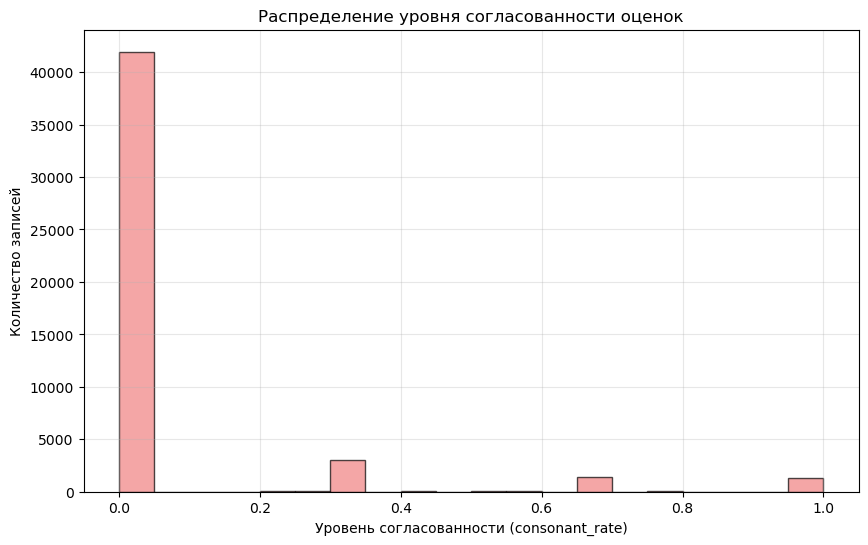

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(CrowdAnnotations['consonant_rate'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
plt.xlabel('Уровень согласованности (consonant_rate)')
plt.ylabel('Количество записей')
plt.title('Распределение уровня согласованности оценок')
plt.grid(True, alpha=0.3)
plt.show()

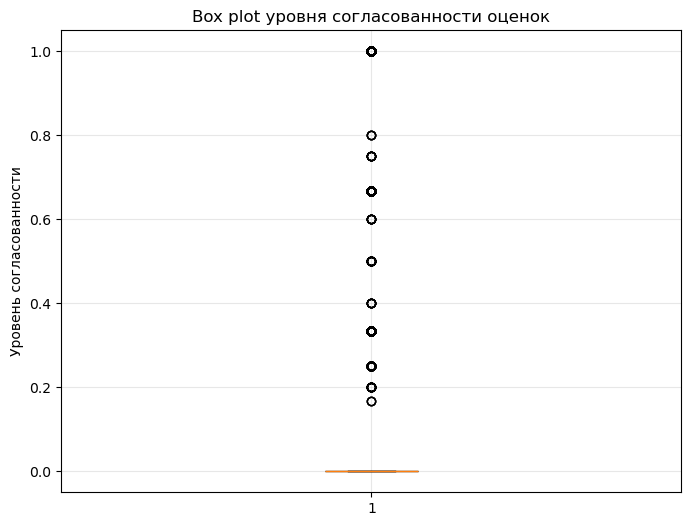

In [37]:
plt.figure(figsize=(8, 6))
plt.boxplot(CrowdAnnotations['consonant_rate'], vert=True, patch_artist=True)
plt.ylabel('Уровень согласованности')
plt.title('Box plot уровня согласованности оценок')
plt.grid(True, alpha=0.3)
plt.show()

Это просто отвратительно. Почему так много несогласных? 

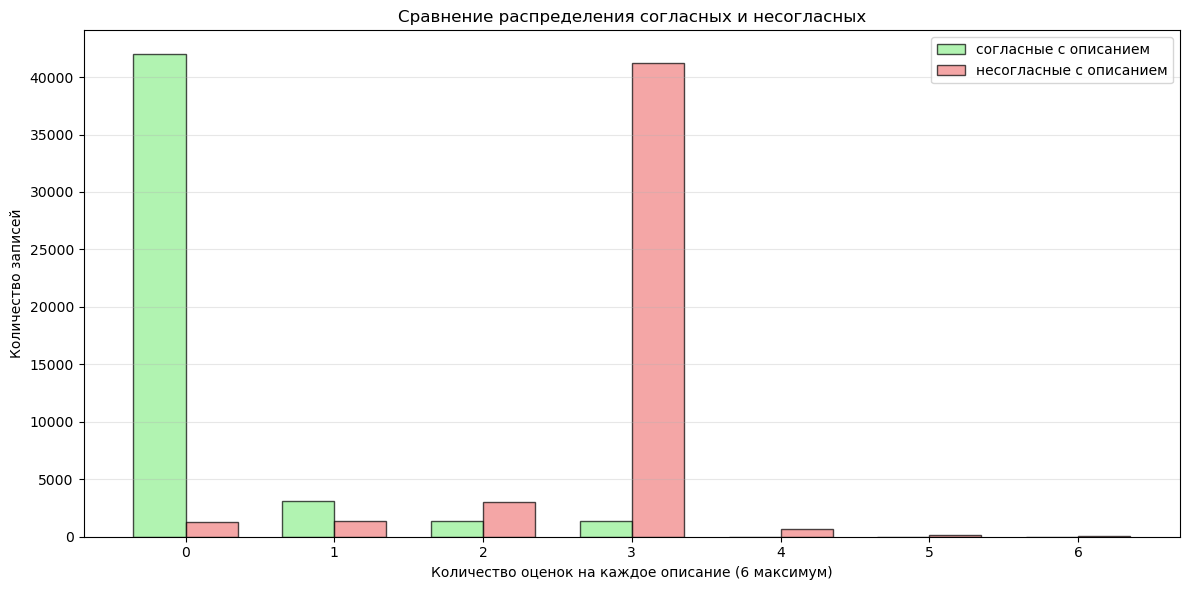

In [38]:
plt.figure(figsize=(12, 6))

max_count = max(CrowdAnnotations['consonant_count'].max(), CrowdAnnotations['dissenters_count'].max())
count_range = range(0, max_count + 1)

consonant_data = [CrowdAnnotations[CrowdAnnotations['consonant_count'] == i].shape[0] for i in count_range]
dissenters_data = [CrowdAnnotations[CrowdAnnotations['dissenters_count'] == i].shape[0] for i in count_range]

x = np.arange(len(count_range))
width = 0.35

bars1 = plt.bar(x - width/2, consonant_data, width, label='согласные с описанием', 
                color='lightgreen', alpha=0.7, edgecolor='black')
bars2 = plt.bar(x + width/2, dissenters_data, width, label='несогласные с описанием', 
                color='lightcoral', alpha=0.7, edgecolor='black')

plt.xlabel('Количество оценок на каждое описание (6 максимум)')
plt.ylabel('Количество записей')
plt.title('Сравнение распределения согласных и несогласных')
plt.xticks(x, count_range)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

#### Статистический Анализ ExpertAnnotations

In [39]:
ExpertAnnotations.head()

,image,query_id,first_expert,second_expert,third_expert,average_score
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,1.000000
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,1.333333
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2,1.333333
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2,1.666667
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2,1.333333


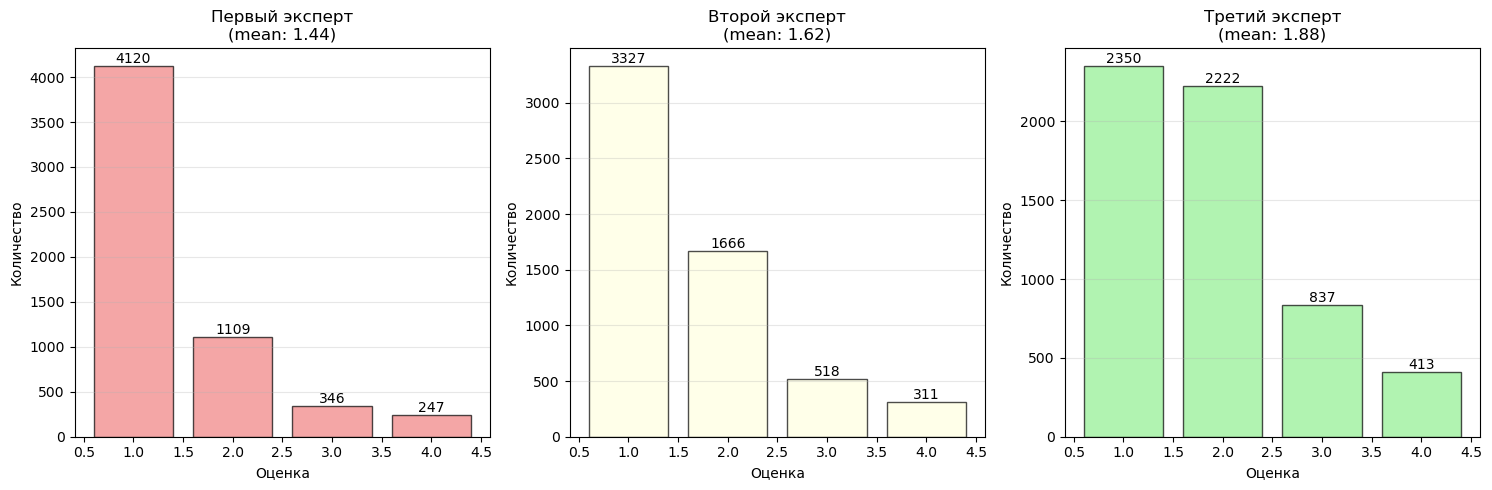

In [40]:
plt.figure(figsize=(15, 5))

experts = ['first_expert', 'second_expert', 'third_expert']
titles = ['Первый эксперт', 'Второй эксперт', 'Третий эксперт']

for i, (expert, title) in enumerate(zip(experts, titles), 1):
    plt.subplot(1, 3, i)
    score_counts = ExpertAnnotations[expert].value_counts().sort_index()
    bars = plt.bar(score_counts.index, score_counts.values, color=['lightcoral', 'lightyellow', 'lightgreen', 'lightblue'][i-1], 
                   edgecolor='black', alpha=0.7)
    plt.xlabel('Оценка')
    plt.ylabel('Количество')
    plt.title(f'{title}\n(mean: {ExpertAnnotations[expert].mean():.2f})')
    plt.grid(True, alpha=0.3, axis='y')
    
    # Добавляем значения на столбцы
    for bar, value in zip(bars, score_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                 f'{value}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

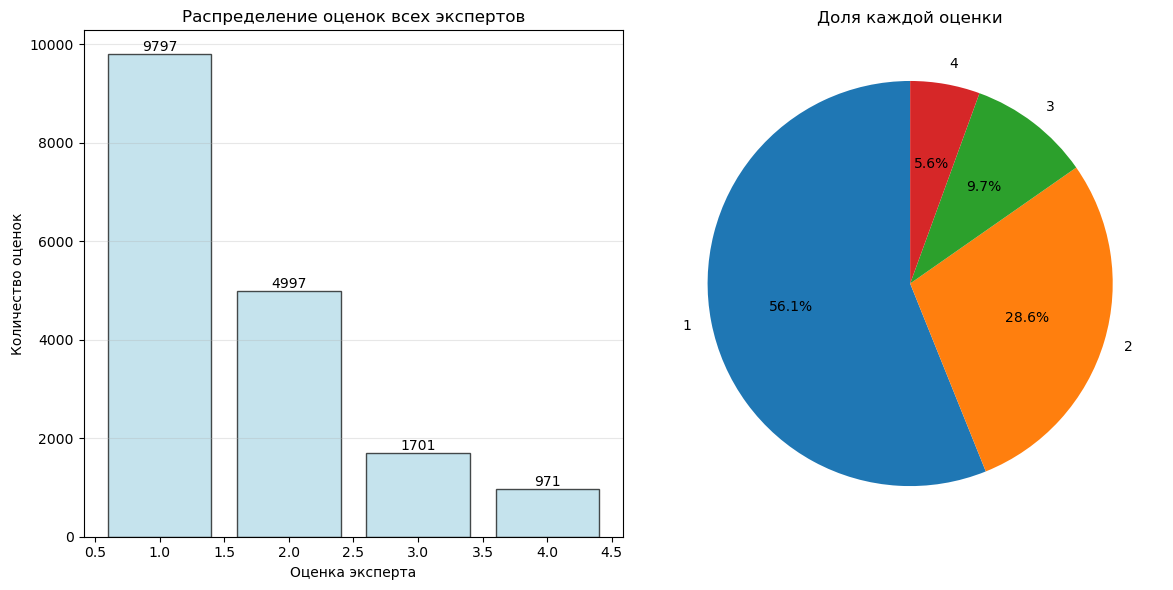

In [41]:
plt.figure(figsize=(12, 6))
all_scores = pd.concat([
    ExpertAnnotations['first_expert'], 
    ExpertAnnotations['second_expert'], 
    ExpertAnnotations['third_expert']
])

score_counts = all_scores.value_counts().sort_index()

plt.subplot(1, 2, 1)
bars = plt.bar(score_counts.index, score_counts.values, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Оценка эксперта')
plt.ylabel('Количество оценок')
plt.title('Распределение оценок всех экспертов')
plt.grid(True, alpha=0.3, axis='y')

for bar, value in zip(bars, score_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{value}', ha='center', va='bottom')


plt.subplot(1, 2, 2)
plt.pie(score_counts.values, labels=score_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Доля каждой оценки')

plt.tight_layout()
plt.show()

Ну, вывод подтвержден. Большая часть фото из датасета ПОЛНОСТЬЮ несоответствует описаниям.

In [42]:
train_dataset.head()

,image,query_id,query_text,average_score,consonant_rate,lemmatized_text,law
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.000000,0.0,young child wear blue goggle sit float pool,True
1,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.666667,0.0,young child wear blue goggle sit float pool,True
2,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,4.000000,1.0,young child wear blue goggle sit float pool,True
3,3030566410_393c36a6c5.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,2.333333,0.0,young child wear blue goggle sit float pool,True
4,3718964174_cb2dc1615e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.000000,0.0,young child wear blue goggle sit float pool,True


#### Статистический Анализ train_dataset

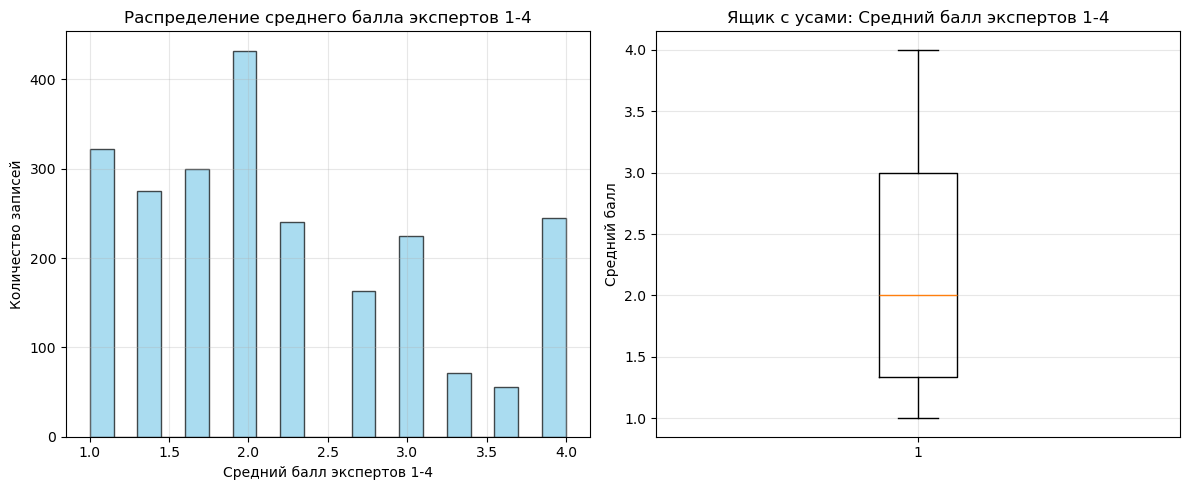

In [43]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(train_dataset['average_score'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Cредний балл экспертов 1-4')
plt.ylabel('Количество записей')
plt.title('Распределение среднего балла экспертов 1-4')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(train_dataset['average_score'])
plt.ylabel('Cредний балл')
plt.title('Ящик с усами: Cредний балл экспертов 1-4')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Средний балл от 1.0 до 4.0 можно рассматривать как степень соответствия:
1.0-1.5 - практически не соответствуют
1.5-2.5 - частичное соответствие с оговорками
2.5-3.5 - хорошее соответствие с мелкими недочетами
3.5-4.0 - практически полное соответствие

Для себя принимаю за соответствие все, что равно или выше 2.5

Хетмап поможет разобраться. Сравню average_score и consonant_rate.

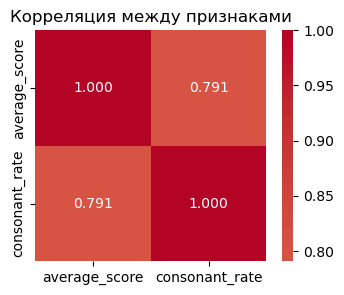

In [44]:
numeric_cols = ['average_score', 'consonant_rate']
correlation_matrix = train_dataset[numeric_cols].corr()

plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f')
plt.title('Корреляция между признаками')
plt.show()

0.791. Связь не полная лишь потому, что у экспертов была более широкая шкала оценки. От 1 до 4. 

У краудфандингистов была лишь бинарная система исчисления. Соответствует или несоответствует.

УВЫ, но мне придется отбросить краудфандингистов и взять мнение экспертов. Тем более их average_score даже подходит в качестве целевого признака, ибо по тз модель должна предсказывать итоговую оценку экспертов.

### Удаление изображений с дисклеймером

И вот, проведя детальный анализ, я решил что удалю не просто изображения с детьми.

Нет. Данные устроены сложнее. Так как среди них есть ложноописанные, я удалю те, где в описании есть дети и рейтинг экспертов больше 1.5.

Это будет означать, что если описание хоть частично правдиво, то почти наверняка главные действующие лица на этих фото присутствует.

А где описание ложно(меньше 1.5), то зачем удалять?

In [45]:
print(f"Было: {len(train_dataset)}")
lentraindataset = len(train_dataset)
train_dataset = train_dataset[~((train_dataset['law'] == True) & (train_dataset['average_score'] > 1.5))]
print(f"стало: {len(train_dataset)}")
train_dataset.head()

Было: 2329
стало: 2137


,image,query_id,query_text,average_score,consonant_rate,lemmatized_text,law
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.000000,0.0,young child wear blue goggle sit float pool,True
4,3718964174_cb2dc1615e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.000000,0.0,young child wear blue goggle sit float pool,True
6,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,A girl wearing a yellow shirt and sunglasses s...,1.333333,0.0,girl wear yellow shirt sunglasse smile,False
7,1167669558_87a8a467d6.jpg,2718495608_d8533e3ac5.jpg#2,A girl wearing a yellow shirt and sunglasses s...,2.333333,0.0,girl wear yellow shirt sunglasse smile,False
8,2718495608_d8533e3ac5.jpg,2718495608_d8533e3ac5.jpg#2,A girl wearing a yellow shirt and sunglasses s...,4.000000,1.0,girl wear yellow shirt sunglasse smile,False


Без этого уточнения, я бы удалил 11% данных, а так, было удалено:

In [46]:
print(f"Осталось {(len(train_dataset) / lentraindataset * 100):.2f}% данных")
print(f"Удалено {100-(len(train_dataset) / lentraindataset * 100):.2f}% данных")

Осталось 91.76% данных
Удалено 8.24% данных


## Векторизация

### Векторизация изображений

Перейдём к векторизации изображений.

Самый примитивный способ — прочесть изображение и превратить полученную матрицу в вектор. Такой способ нам не подходит: длина векторов может быть сильно разной, так как размеры изображений разные. Поэтому стоит обратиться к свёрточным сетям: они позволяют <strong>«</strong>выделить<strong>»</strong> главные компоненты изображений. Как это сделать? Нужно выбрать какую-либо архитектуру, например ResNet-18, посмотреть на слои и исключить полносвязные слои, которые отвечают за конечное предсказание. При этом можно загрузить модель данной архитектуры, предварительно натренированную на датасете ImageNet.

Сделайте векторизацию изображений с использованием модели ResNet50 из библиотеки Keras или PyTorch.

In [47]:
def load_train(path=PATH) -> ImageDataGenerator:
    train_datagen = ImageDataGenerator(rescale=1/255.)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=train_dataset,
        directory=Path(path, 'train_images'),
        x_col='image',
        y_col='score',
        target_size=(256, 256),
        batch_size=16,
        class_mode='input',
        seed=RANDOM_SEED)
    
    return train_gen_flow

Found 2137 validated image filenames.


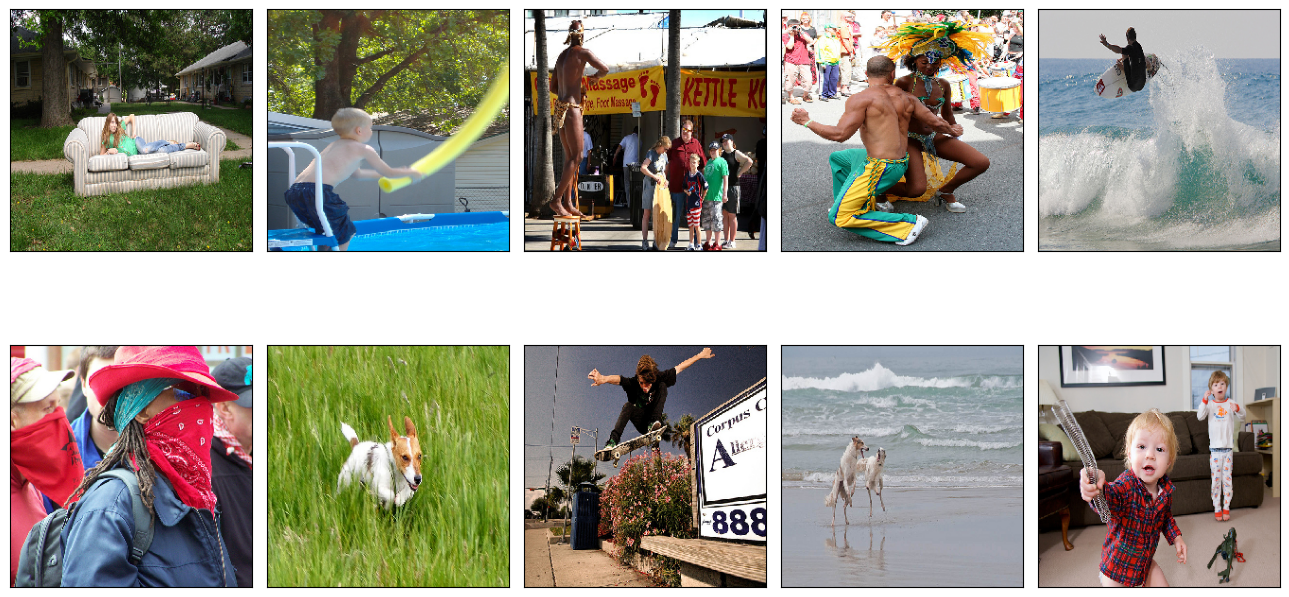

In [48]:
flow_train = load_train()
features, target = next(flow_train)

fig = plt.figure(figsize=(13,10))
for i in range(10):
    fig.add_subplot(2, 5, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()

In [49]:
def create_model(input_shape=(256, 256, 3)):
    backbone = ResNet50(input_shape=input_shape, weights='imagenet', include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    optimizer = Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    
    return model

In [50]:
def vectorize_pictures(model, train_data):
    predictions = model.predict(train_data)
    
    return predictions

In [51]:
pict_embeds = vectorize_pictures(create_model(), load_train())

Found 2137 validated image filenames.


C:\Users\Neria\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


134/134 ━━━━━━━━━━━━━━━━━━━━ 45s 328ms/step


### Векторизация текстового описания

Следующий этап — векторизация текстов.
Сделайте векторизацию текстового описания одним из следующих методов:
TF-IDF (простой);
BERT;
word2vec.


In [52]:
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    min_df=2,
    max_df=0.9,
    ngram_range=(1, 2),
    stop_words='english'
)

text_embeds = tfidf_vectorizer.fit_transform(train_dataset['lemmatized_text'])

Дайте описание получившихся пар векторов с точки зрения их размерностей.

In [53]:
pict_embeds.shape

(2137, 2048)

In [54]:
text_embeds.shape

(2137, 2216)

Нормальный размер. Почти ровное направление. Но все же...

### Попытка сделать конкатенированный вектор
Подготовьте данные для обучения: объедините векторы изображений и векторы текстов с целевой переменной.

#### Объединение векторов

Ранее я складывал векторы, но теперь вместо конкатенации я их умножу для сохранения размерности.

Иначе получается 2000 на 4000, что вызвало проблему при обучении одной из моделей.

In [55]:
X = pict_embeds * text_embeds.toarray()[:, :2048]
X.shape

(2137, 2048)

Умножение создает взаимодействия признаков, так как они связанны друг с другом

In [56]:
y = np.array(train_dataset['average_score'])
y.shape

(2137,)

In [57]:
gss = GroupShuffleSplit(n_splits=1, train_size=.8, random_state=RANDOM_SEED)
train_indices, test_indices = next(gss.split(X=X, y=y, groups=train_dataset['image']))

In [58]:
X_train, X_test, y_train, y_test = X[train_indices], X[test_indices], y[train_indices], y[test_indices]

In [59]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Промежуточный вывод

И вот, признаки объединены (2329, 4488) = 2048 (image) + 2440 (text)
Почему целевая переменная - average_score? Да потому что краундфайдигисты хоть и корректно отмечали данные, но их система оценки очень негибкая, а потому не точна. Необъективно.

Теперь сама модель

## Шаг 3. Обучите модель

Создайте модель, которая покажет близость двух векторов. Модель должна принимать на вход конкатенированный вектор, состоящий из векторов описания и изображений, и предсказывать итоговую оценку экспертов.

### Обучение модели предсказания соответствия

Для обучения разделите датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки.
Для того чтобы учесть изображения при разбиении, можно воспользоваться классом [GroupShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html) из библиотеки sklearn.model_selection.

Код ниже разбивает датасет на тренировочную и тестовую выборки в пропорции 7:3 так, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

```
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X=df.drop(columns=['target']), y=df['target'], groups=df['group_column']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]

```

Какую модель использовать — выберите самостоятельно. Также вам предстоит выбрать метрику качества либо реализовать свою.

In [60]:
#from sklearn.model_selection import GroupShuffleSplit
#gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
#train_indices, test_indices = next(gss.split(X=df.drop(columns=['target']), y=df['target'], groups=df['group_column']))
#train_df, test_df = df.loc[train_indices], df.loc[test_indices]
 

#### LinearSVR

In [61]:
model = LinearSVR(random_state=RANDOM_SEED)

param_grid = {
    'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'],
    'C': [0.1, 1],
    'max_iter': [1000, 8900], 
    'epsilon': [0.2, 0.3]
}

gs_svr = GridSearchCV(
    LinearSVR(random_state=RANDOM_SEED),
    param_grid,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    cv=GroupShuffleSplit(n_splits=3, random_state=RANDOM_SEED),
    verbose=1
)

%time gs_svr.fit(X_train, y_train, groups=train_dataset['image'].iloc[train_indices])

Fitting 3 folds for each of 16 candidates, totalling 48 fits
CPU times: total: 1.62 s
Wall time: 50.7 s


C:\Users\Neria\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=GroupShuffleSplit(n_splits=3, random_state=89, test_size=None,
         train_size=None),
             estimator=LinearSVR(random_state=89), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'epsilon': [0.2, 0.3],
                         'loss': ['epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'max_iter': [1000, 8900]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [62]:
gs_svr.best_score_

np.float64(-1.981042003024706)

#### Ridge Regression

In [63]:
from sklearn.linear_model import Ridge

In [64]:
%%time
ridge_model = Ridge(alpha=10.0, random_state=RANDOM_SEED) 
ridge_model.fit(X_train, y_train)

ridge_score = cross_val_score(
    ridge_model, X_train, y_train, 
    groups=train_dataset['image'].iloc[train_indices], 
    scoring='neg_root_mean_squared_error',
    cv=GroupShuffleSplit(n_splits=3, random_state=RANDOM_SEED)  
).mean()

ridge_rmse = abs(ridge_score).round(decimals=3)
print(f"Ridge CV RMSE: {ridge_rmse}")

Ridge CV RMSE: 1.476
CPU times: total: 1.89 s
Wall time: 265 ms


#### NeuralNetwork 

In [65]:
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_sizes=[256, 64, 16], output_size=1):
        super(SimpleNet, self).__init__()
        
        layers = []
        prev_size = input_size
        
        for hidden_size in hidden_sizes:
            layers.extend([
                nn.Linear(prev_size, hidden_size),
                nn.ReLU(),
                nn.BatchNorm1d(hidden_size),
                nn.Dropout(0.2)
            ])
            prev_size = hidden_size
        
        layers.append(nn.Linear(prev_size, output_size))
        
        self.network = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.network(x).squeeze()

In [66]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

print(f"X_train: {X_train_tensor.shape}")
print(f"y_train: {y_train_tensor.shape}")


X_train: torch.Size([1716, 2048])
y_train: torch.Size([1716])


In [67]:
def train_model(model, X_train, y_train, X_test, y_test, epochs=100, batch_size=64):
    train_losses = []
    test_rmses = []
    
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        num_batches = ceil(len(X_train) / batch_size)
        indices = torch.randperm(len(X_train))
        
        for batch_idx in range(num_batches):
            start_idx = batch_idx * batch_size
            end_idx = start_idx + batch_size
            
            batch_indices = indices[start_idx:end_idx]
            X_batch = X_train[batch_indices]
            y_batch = y_train[batch_indices]
            
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)

            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        if epoch % 10 == 0 or epoch == epochs - 1:
            model.eval()
            with torch.no_grad():
                test_predictions = model(X_test)
                test_rmse = torch.sqrt(criterion(test_predictions, y_test)).item()
                test_rmses.append(test_rmse)
                
                print(f'Epoch {epoch:3d} | Train Loss: {total_loss/num_batches:.4f} | Test RMSE: {test_rmse:.4f}')
    
    return test_rmses

In [68]:
input_size = X_train.shape[1]
model = SimpleNet(input_size)

In [69]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
criterion = nn.MSELoss()
test_rmses = train_model(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, epochs=150, batch_size=128)

Epoch   0 | Train Loss: 5.0727 | Test RMSE: 2.9015
Epoch  10 | Train Loss: 4.4428 | Test RMSE: 36.0183
Epoch  20 | Train Loss: 4.1971 | Test RMSE: 58.0109
Epoch  30 | Train Loss: 4.0558 | Test RMSE: 89.6177
Epoch  40 | Train Loss: 3.8089 | Test RMSE: 69.0202
Epoch  50 | Train Loss: 3.6361 | Test RMSE: 59.3726
Epoch  60 | Train Loss: 3.4592 | Test RMSE: 57.2716
Epoch  70 | Train Loss: 3.2665 | Test RMSE: 60.6048
Epoch  80 | Train Loss: 3.0173 | Test RMSE: 75.0580
Epoch  90 | Train Loss: 2.8055 | Test RMSE: 93.3646
Epoch 100 | Train Loss: 2.5476 | Test RMSE: 84.2843
Epoch 110 | Train Loss: 2.2853 | Test RMSE: 75.6227
Epoch 120 | Train Loss: 2.0105 | Test RMSE: 71.6683
Epoch 130 | Train Loss: 1.8415 | Test RMSE: 73.0779
Epoch 140 | Train Loss: 1.6866 | Test RMSE: 101.5784
Epoch 149 | Train Loss: 1.4942 | Test RMSE: 127.6406


In [70]:
print(min(test_rmses))


2.9015395641326904


### Промежуточный вывод

По параметрам трех моделей, я вижу что LinearRegression хуже остальных справилась с задачей, а NeuralNetwork напротив выдала лучшие результаты но все сделала это хуже чем Ridge.

Буду пока тестировать Ridge.

Да, LinearSVR не работала.

## 7. Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки `test_images`, выберите случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

О нет. Мы обработали train_dataset и train_images, обучив на нем модель
Я совсем забыл про test_queries и test_images

Нет, лучше сделать это сейчас. На этом этапе.

### Эмбеддингирование

In [71]:
def create_feature_extractor():
    backbone = ResNet50(input_shape=(256, 256, 3), weights='imagenet', include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    return model



In [72]:
def vect_gen_train(img_path):
    image = Image.open(img_path).convert('RGB')
    image = image.resize((256, 256))
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    
    model = create_feature_extractor()
    embedding = model.predict(image_array, verbose=0)
    return embedding.flatten()

In [73]:

def get_test_image_embeddings(image_folder='C:/Users/Neria/Desktop/Project_five/dsplus_integrated_project_4/to_upload/test_images'):
    image_embeddings = {}
    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')]
    
    print(f"Создаем эмбеддинги для {len(image_files)} тестовых изображений...")
    
    for img_name in tqdm(image_files):
        img_path = os.path.join(image_folder, img_name)
        try:
            embedding = vect_gen_train(img_path)
            image_embeddings[img_name] = embedding
        except Exception as e:
            print(f"Ошибка с изображением {img_name}: {e}")
    
    return image_embeddings


In [74]:
test_image_embeddings = get_test_image_embeddings()
print(f"✅ Создано тестовых эмбеддингов: {len(test_image_embeddings)}")

Создаем эмбеддинги для 100 тестовых изображений...


  2%|█▋                                                                                | 2/100 [00:03<02:30,  1.54s/it]

  3%|██▍                                                                               | 3/100 [00:04<02:45,  1.71s/it]

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:28<00:00,  1.49s/it]

✅ Создано тестовых эмбеддингов: 100


### Тестирование лучшей модели

Для экономии ресурсов, тестироваться будет только лучшая модель.

In [75]:
simple_queries = test_queries.sample(10, random_state=RANDOM_SEED)

for i, (idx, row) in enumerate(simple_queries.iterrows()):
    query_text = row['query_text']
    print(f"\n{i+1}. Запрос: {query_text}")
    
    best_score = -1000
    best_image = None
    
    for img_name, img_vec in test_image_embeddings.items():
        query_vec = tfidf_vectorizer.transform([query_text]).toarray().flatten()[:2048]
        combined = img_vec * query_vec
        
        score = ridge_model.predict([combined])[0]
        
        if score > best_score:
            best_score = score
            best_image = img_name
    
    print(f"   Найдено: {best_image}")
    print(f"   Score: {best_score:.3f}")




1. Запрос: The man is dressed in black and smiling while another man is drinking and an elderly woman is standing near a fence .
   Найдено: 1177994172_10d143cb8d.jpg
   Score: 2.181

2. Запрос: a little white and tan dog running through the grass with a stick in his mouth .
   Найдено: 2505056124_1276e8dbcb.jpg
   Score: 2.180

3. Запрос: A black and white dog with a green collar stands in front of a sign .
   Найдено: 3517023411_a8fbd15230.jpg
   Score: 2.226

4. Запрос: Two dogs are shaking themselves dry on the path next to the water .
   Найдено: 3421547427_53411b6278.jpg
   Score: 2.320

5. Запрос: A dog wearing jeans and a shirt stands on the sidewalk .
   Найдено: 2505056124_1276e8dbcb.jpg
   Score: 2.191

6. Запрос: A man is standing with his arms spread wide and an open vest exposing his chest .
   Найдено: 123997871_6a9ca987b1.jpg
   Score: 2.186

7. Запрос: Boy flying a distant kite .
   Найдено: 2121140070_a09644550b.jpg
   Score: 2.181

8. Запрос: Several female lacrosse

### Визуальное сравнение качества поиска.

Посмотрим

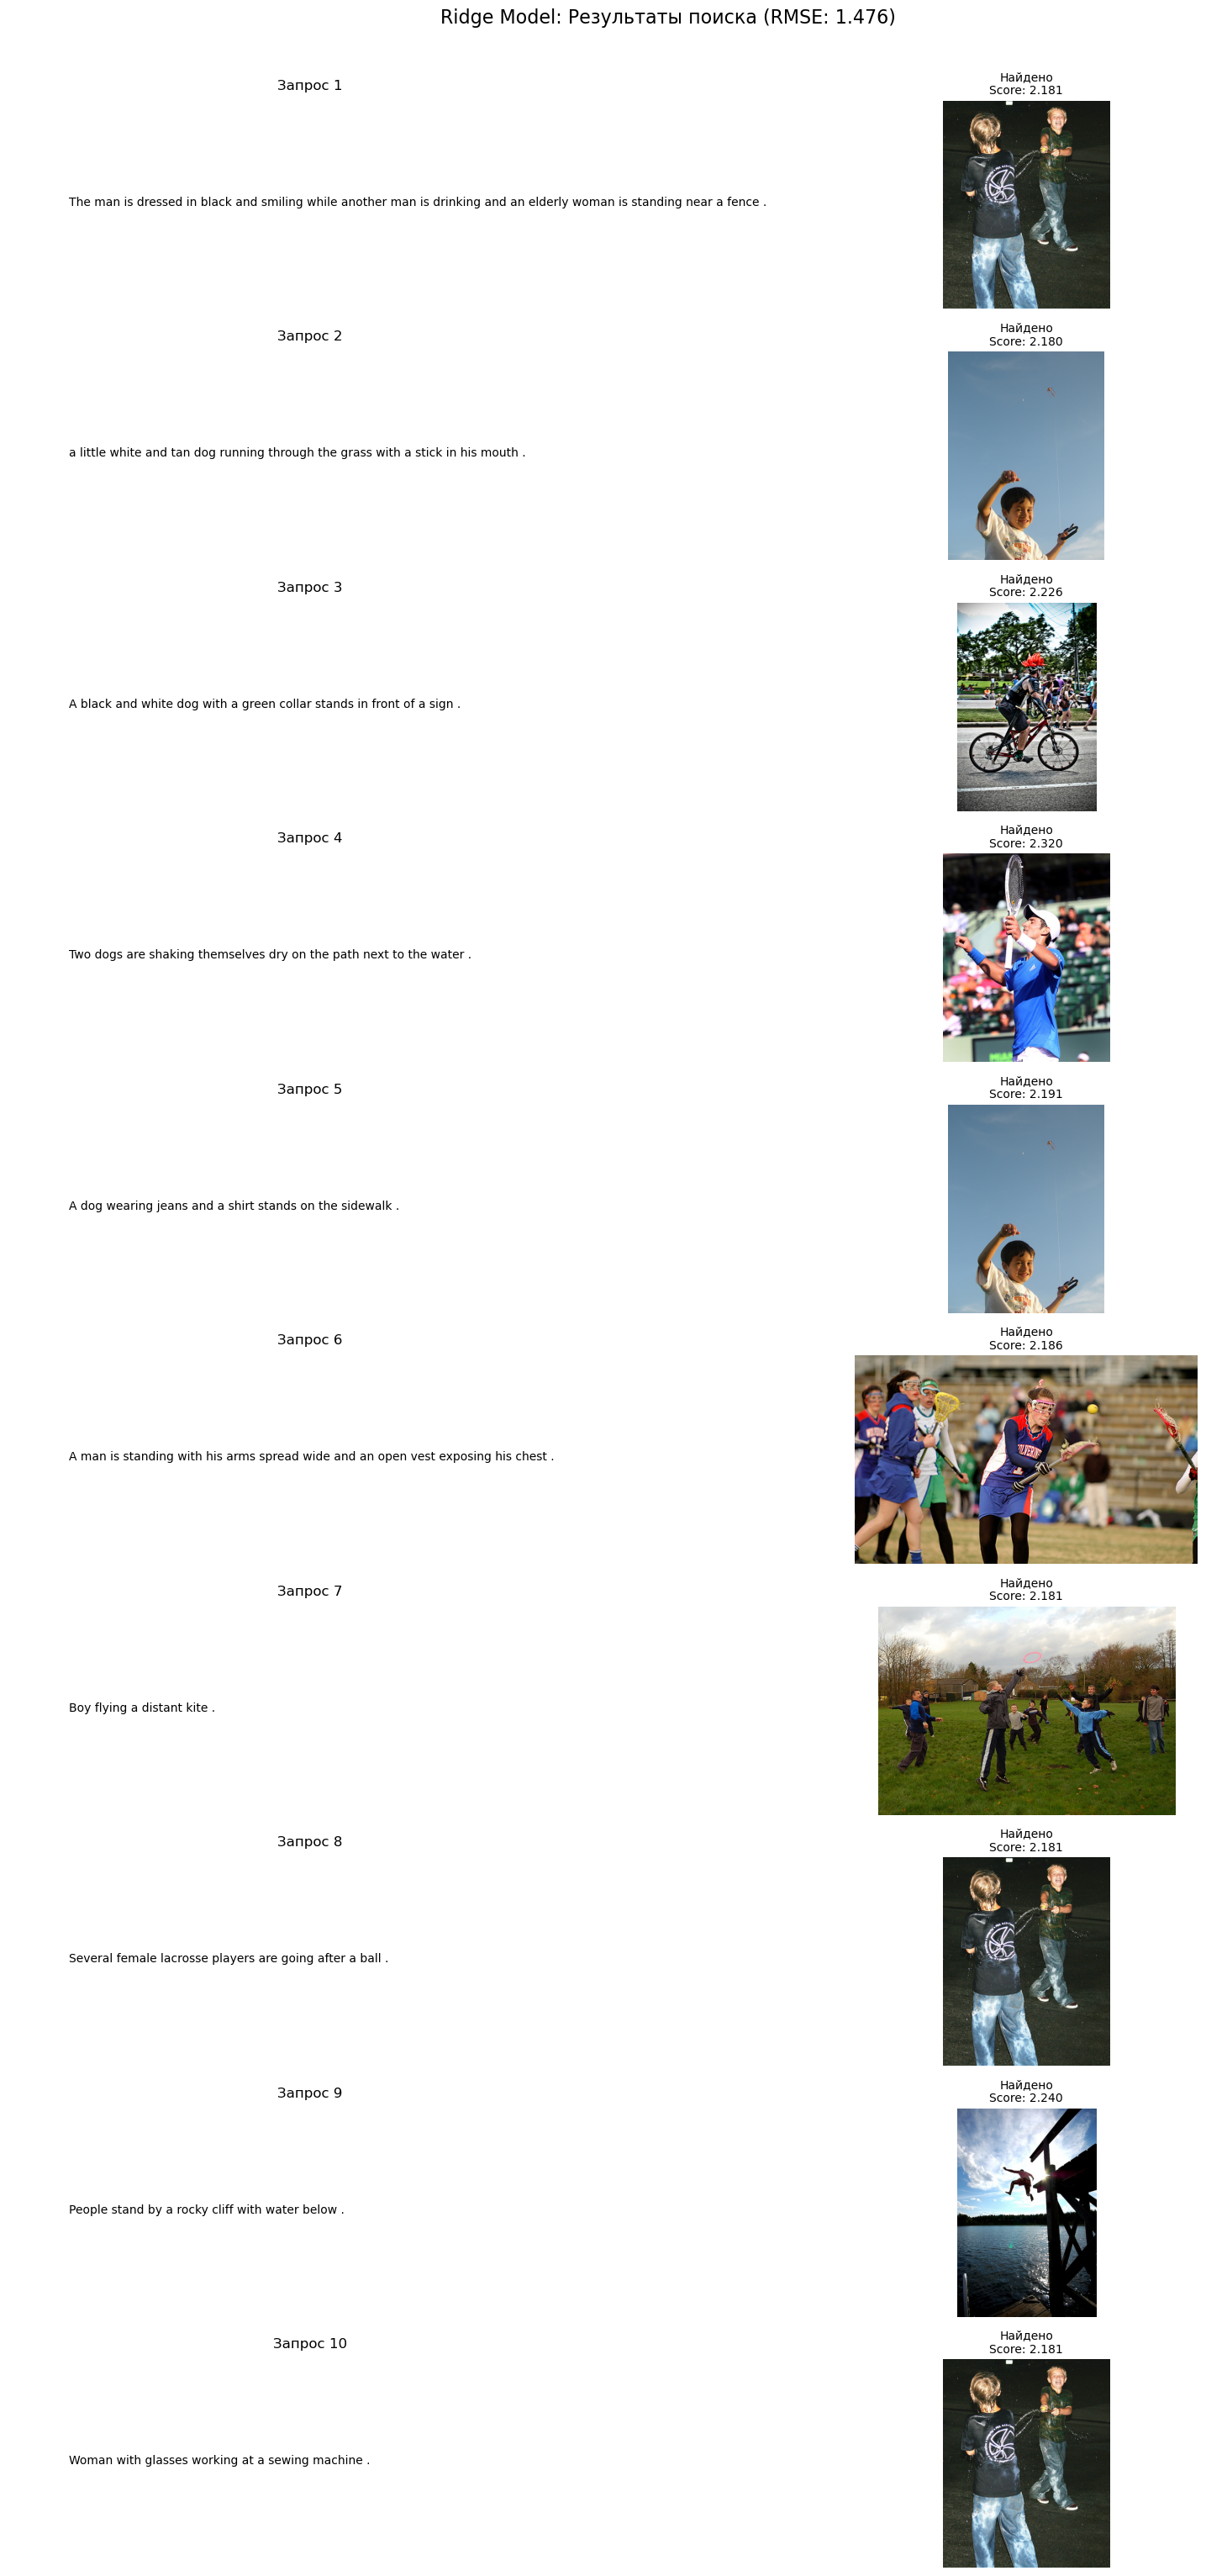

In [76]:
fig, axes = plt.subplots(10, 2, figsize=(16, 30))

for i, (idx, row) in enumerate(simple_queries.iterrows()):
    query_text = row['query_text']
    
    axes[i, 0].text(0.1, 0.5, query_text, fontsize=10, wrap=True)
    axes[i, 0].set_xlim(0, 1)
    axes[i, 0].set_ylim(0, 1)
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f'Запрос {i+1}', fontsize=12, pad=10)
    
    best_score = -1000
    best_image = None
    
    for img_name, img_vec in test_image_embeddings.items():
        query_vec = tfidf_vectorizer.transform([query_text]).toarray().flatten()[:2048]
        combined = img_vec * query_vec
        score = ridge_model.predict([combined])[0]
        
        if score > best_score:
            best_score = score
            best_image = img_name
    
    img_path = f'C:/Users/Neria/Desktop/Project_five/dsplus_integrated_project_4/to_upload/test_images/{best_image}'
    try:
        img = Image.open(img_path)
        axes[i, 1].imshow(img)
        axes[i, 1].set_title(f'Найдено\nScore: {best_score:.3f}', fontsize=10)
    except:
        axes[i, 1].text(0.5, 0.5, 'Ошибка загрузки', ha='center', va='center', fontsize=12)
    
    axes[i, 1].axis('off')

plt.tight_layout()
plt.suptitle('Ridge Model: Результаты поиска (RMSE: 1.476)', fontsize=16, y=1.02)
plt.show()


### Выводы

Jupyter Notebook был открыт мной через Anaconda. А данные загружены с сервера yandex.

Весь код выполняется без ошибок. Если ошибки наблюдаются, то это из-за неправильности пути к файлам. Это зависит от среды выполнения. Рекомендуется обновить библиотеки и путь к файлам.
Ячейки с кодом расположены в порядке исполнения. Все рассортировано по содержанию.
Исследовательский анализ данных выполнен. Все данные соответствуют описанию, проблем в данных нет. Данные были визуализированны и выводы сделаны.

Проверены экспертные оценки и краудсорсинговые оценки. Выбор был сделан в пользу экспертные оценки, поскольку описание краудсорсингистов было слишком топорным из-за бинарной системы оценок изображений из-за которой модель могла за любое малейшее несоответствие, что в итоге делает поисковую систему невалидной.
Из датасета исключены те объекты, которые выходят за рамки юридических ограничений. Удалено 11% данных.
Изображения векторизованы. Общее направление было выявлено.
Текстовые запросы векторизованы. Дальнейшее обьединение векторов так же не вызвало проблем.

Данные корректно разбиты на тренировочную и тестовую выборки. Этот момент мной был понят изначально неправильно, поскольку пришло 1100 изображений, 100 из которых УЖЕ лежали отдельно.
Предложена метрика качества работы модели. Самая простая.
Предложена модель схожести изображений и текстового запроса
модель обучена
По итогам обучения модели сделаны выводы

Проведено тестирование работы модели. В ходе исследования, часто(почти всегда) возникала проблема переобучения и вывода на тесте одинаковых изображений.

Сейчас эта проблема решена. НО проблема обучения появилась не просто так. Дизбаланс классов.
На этапе анализа было выявлено большое количество ложных описаний для изображения, что видно по выводам(итогам тестирования, где мы визуально сравнили качество поиска). Модель хорошо определяет неверные описания к фото. И ВСЁ!
Нужны данные получше.

Лучшая модель - Ridge CV (RMSE: 1.476)


Тяжело.